In [1]:
import scanpy as sc
import mudata as mu
from pathlib import Path
import pandas as pd
import mplscience
import matplotlib.pyplot as plt

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams["legend.scatterpoints"] = 1
%load_ext autoreload
%autoreload 2
%load_ext lab_black

path_data = Path("/lustre/groups/ml01/workspace/moscot_paper/mapping")

['default', 'despine']


In [2]:
adata_sc = sc.read(path_data / "adata_sc_out.h5ad")
adata_p = sc.read(path_data / "adata_cite_processed.h5ad")

In [15]:
# adata_p[:, "CD326"]

/home/icb/giovanni.palla/miniconda3/envs/moscot2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


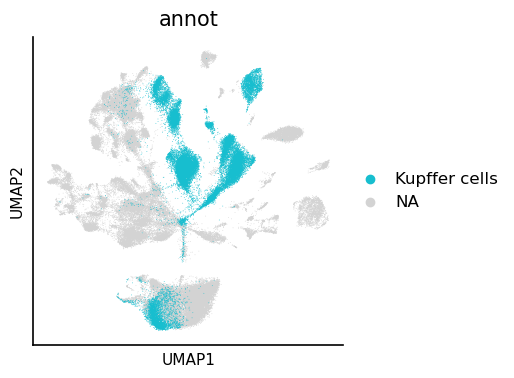

In [4]:
sc.pl.umap(
    adata_p,  # [adata_sc.obs.annot.isin(["Hepatocytes"])],
    color=["annot"],
    ncols=2,
    groups="Kupffer cells",
)

/home/icb/giovanni.palla/miniconda3/envs/moscot2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/home/icb/giovanni.palla/miniconda3/envs/moscot2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


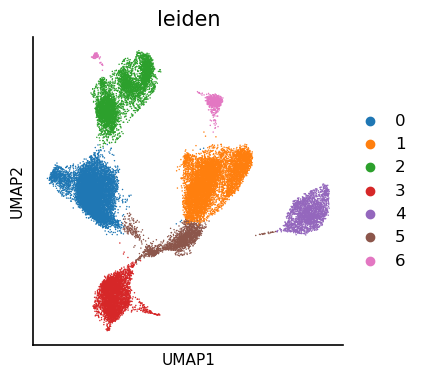

In [5]:
adata_p_kc = adata_p[adata_p.obs.annot.isin(["Kupffer cells"])].copy()
sc.pp.pca(adata_p_kc)
sc.pp.neighbors(adata_p_kc)
sc.tl.umap(adata_p_kc)
sc.tl.leiden(adata_p_kc, resolution=0.3)
sc.pl.umap(
    adata_p_kc,
    color=["leiden"],
)

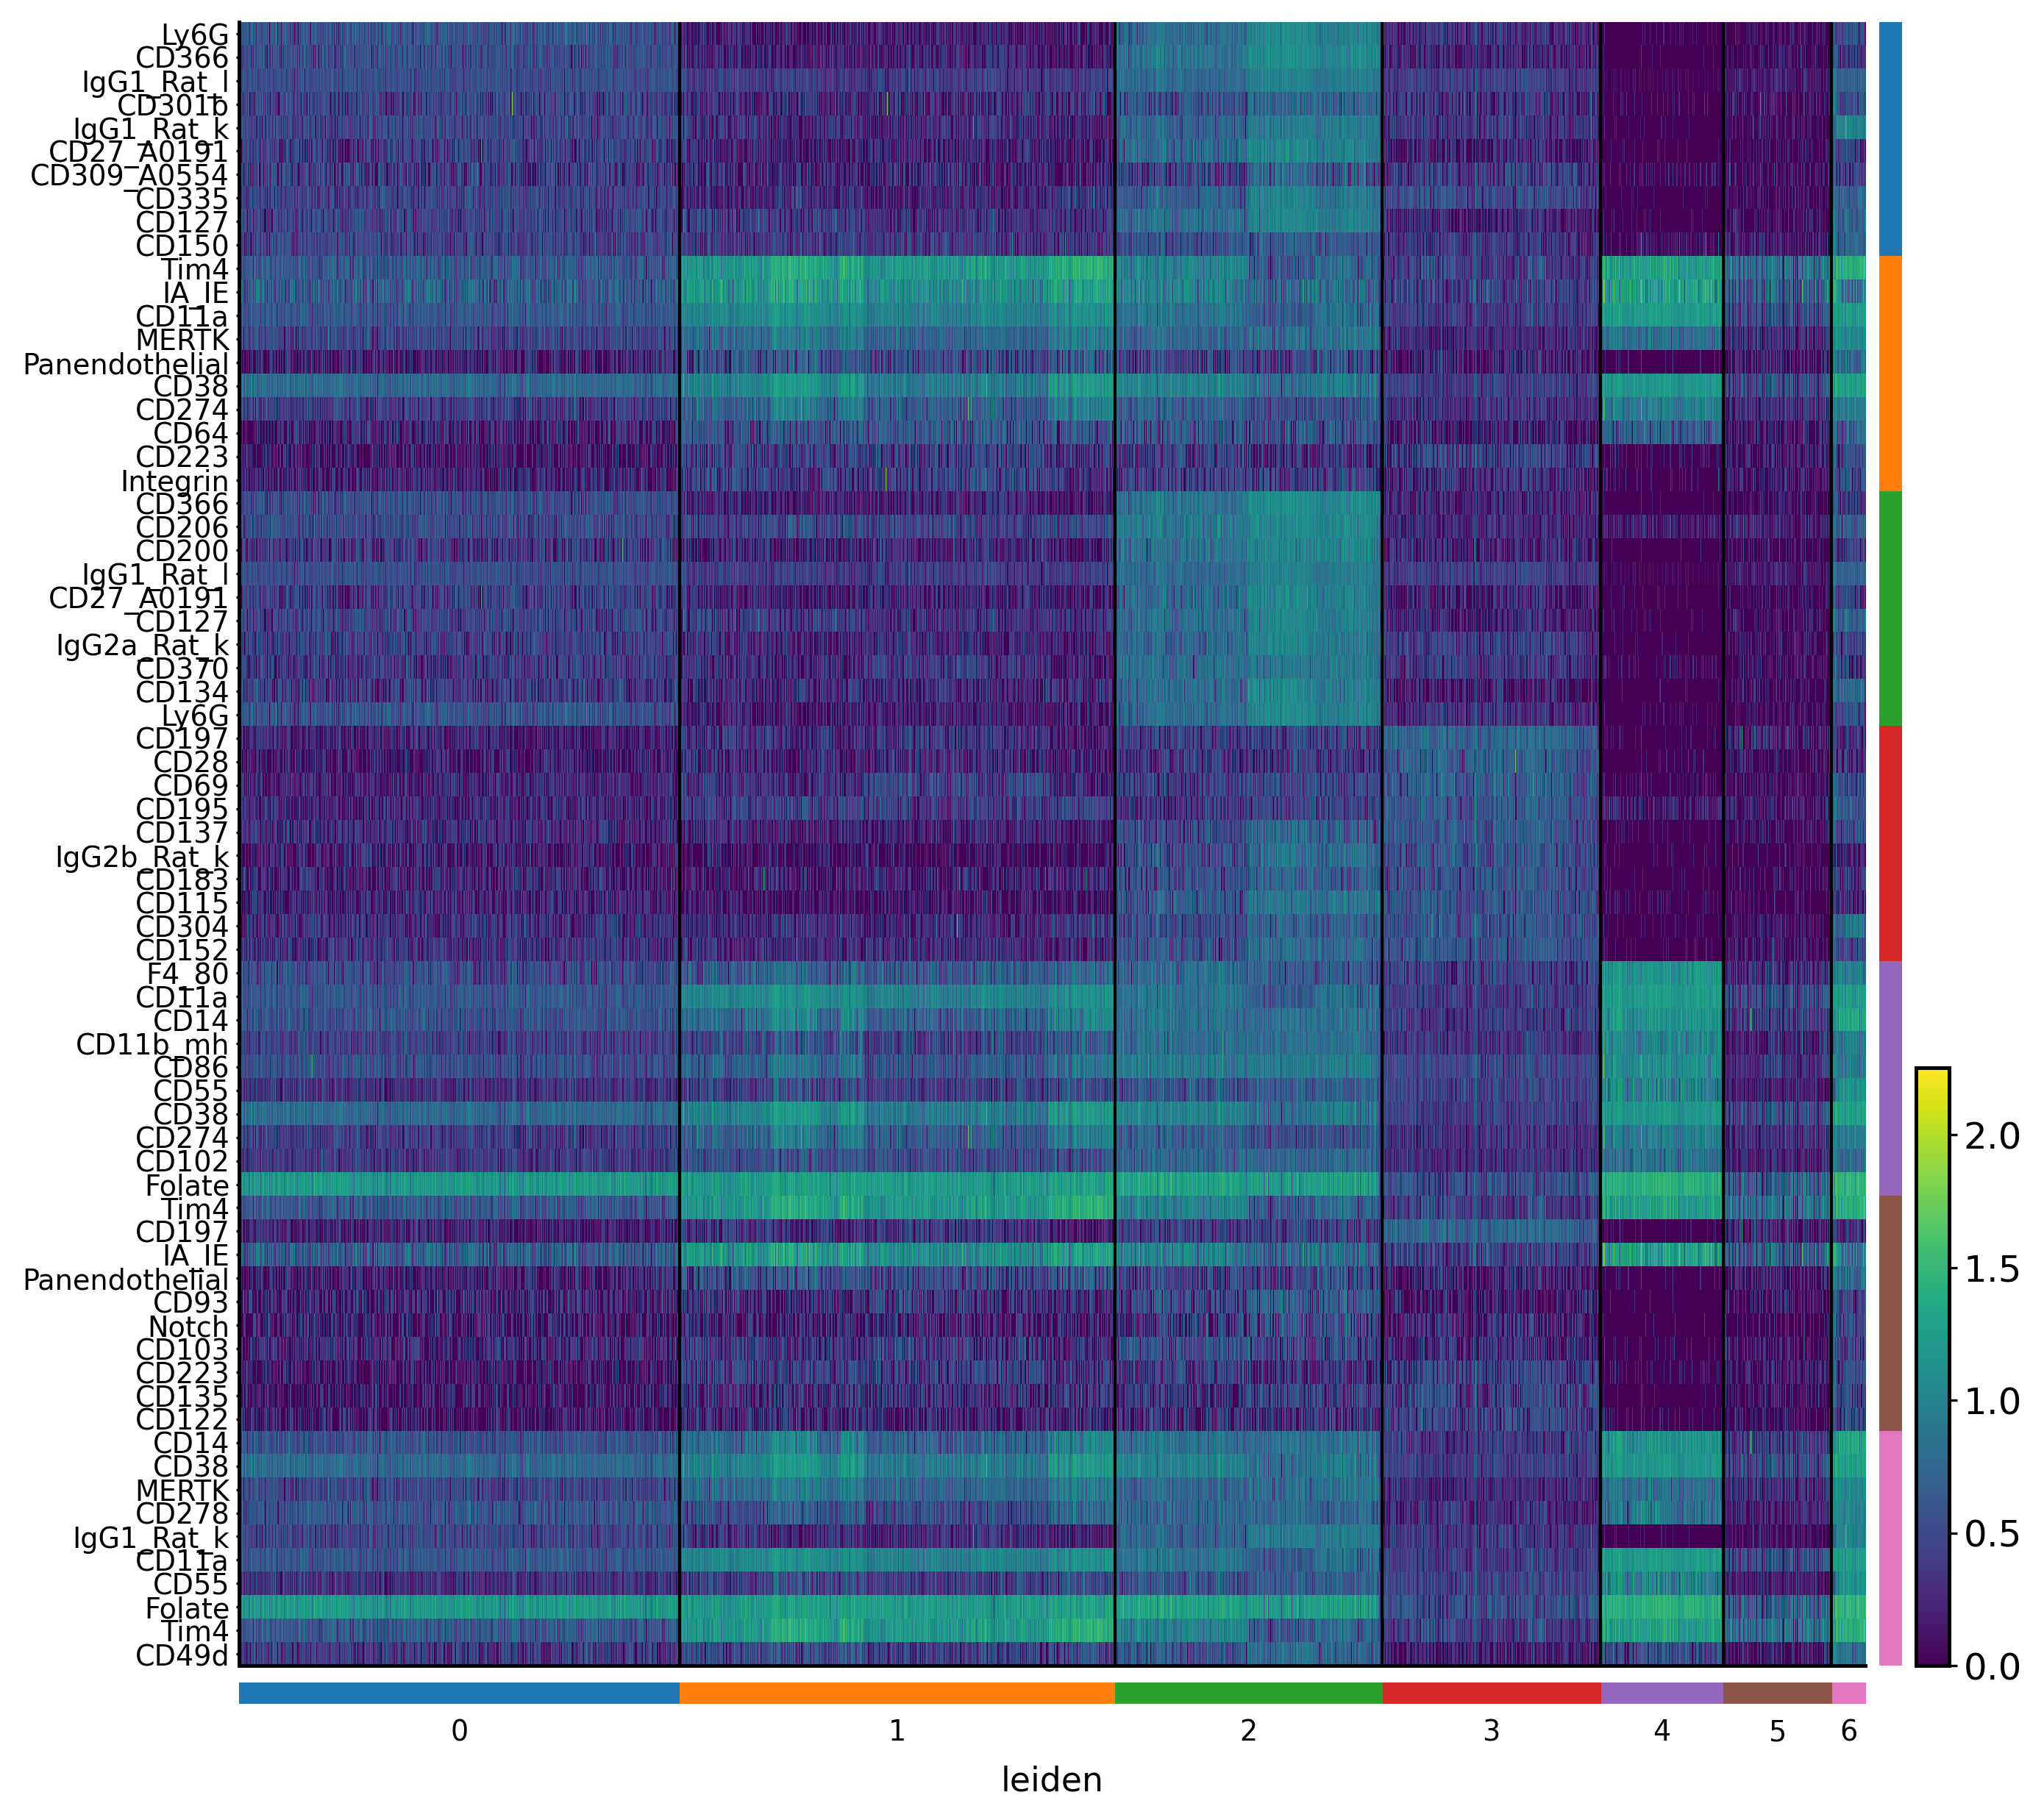

<Figure size 1200x1200 with 0 Axes>

In [8]:
from matplotlib.pyplot import rcParams

sc.tl.rank_genes_groups(adata_p_kc, groupby="leiden", method="wilcoxon")

rcParams["figure.dpi"] = 300
sc.pl.rank_genes_groups_heatmap(
    adata_p_kc,
    dendrogram=False,
    log=True,
    # categories_order=adata_spatial_prot.obs.celltype_mapped.cat.categories,
    n_genes=10,
    show_gene_labels=True,
    figsize=(10, 10),
    swap_axes=True,
)
plt.tight_layout()